In [408]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Lets Create a dummy DataSet for our need!

In [409]:
df= pd.DataFrame({"cgpa":[6.82,6.36,5.39,5.50,6.39,9.13,7.17,7.72], "iq":[118,125,99,106,148,148,147,72], "is_placed":[0,1,1,1,0,1,1,0]})
df

,cgpa,iq,is_placed
0,6.82,118,0
1,6.36,125,1
2,5.39,99,1
3,5.50,106,1
4,6.39,148,0
5,9.13,148,1
6,7.17,147,1
7,7.72,72,0


Now let us begin to train the Gradient Boosting Classification model from scratch.

Along with which the whole algorithm will be explained. Let us have a quick look at our equation for once :

1. Intialize the model (First Model):
<center>$F_{0}(x) = argmin_{γ}\;Σ^{n}_{i=1}L(y_{i},γ)$</center>

2. For m = 1 to M:

2-1. Compute residuals:
<center> $r_{im} = -\;[\dfrac{δL(y_{i}, F(x_{i}))}{δF(x_{i})}]\;_{F(x)=F_{m-1}(x)}$</center>

<center>[for i = 1,2,......,n]</center>

2-2. Train regression tree with features $x$ against $r$ and create terminal nodes $R_{jm}$ for $j=1,...,J_{m}$

2-3. Compute $γ_{jm} = argmin_{γ}\;Σ_{xϵR_{jm}}\; L(y_{i},\; F_{m-1}(x_{i})+γ) $

2-4. Update the model:
<center>$[\;F_{m}(x) = F_{m-1}(x) + lr.γ_{jm}\;]\;:xϵR_{jm}$</center>

In [410]:
# Lets us begin to code.

As per the norm of Gradient Boosting Algorithm we will first create a simple model as our first model.Here for the model we cannot use mean of the values as it is a classification problem instead we will use log(odds):

 <center> $log(odds) = \log(\dfrac{\#1}{\#0}) $ </center>

and then convert it into probability by using Sigmoid function:

<center> $p = \dfrac{1}{1+e^{-\log(odds)}}$ </center>


[You will find an interesting fact that the value you get after converting the log(odds) into probability is actually equal to the mean of the actual prediction column.]

[This is because at the initial step or first model creation step we try to find a value(prediction) where the value of loss function is minimum. And this gives us a linear model] :

<center> $f_{0}(x) = argmin_{γ}Σ^{n}_{i=1} L(y_{i},γ)$

[ Here, the :$\;\;L(\;y,y_{i}=(y_{i}\log(p) + (1-y_{i})\log(1-p))\;)$ ]

[ And : $\;\;γ = \log(odds)$ ] </center>

In [411]:
# counting the number of participants for each class and storing it in a 'count' variable in form of pandas.Series
count = df["is_placed"].value_counts()
# using the inbuilt numpy 'log' function to calculate the log(odds)
np.log(count.iloc[0]/count.iloc[1])

0.5108256237659907

In [412]:
# creating the column for the first predicted log(odds)
df['pred1(log-odds)'] = np.log(count.iloc[0]/count.iloc[1])
df

,cgpa,iq,is_placed,pred1(log-odds)
0,6.82,118,0,0.510826
1,6.36,125,1,0.510826
2,5.39,99,1,0.510826
3,5.50,106,1,0.510826
4,6.39,148,0,0.510826
5,9.13,148,1,0.510826
6,7.17,147,1,0.510826
7,7.72,72,0,0.510826


In [413]:
df['overall_log_odds'] = df['pred1(log-odds)']
df

,cgpa,iq,is_placed,pred1(log-odds),overall_log_odds
0,6.82,118,0,0.510826,0.510826
1,6.36,125,1,0.510826,0.510826
2,5.39,99,1,0.510826,0.510826
3,5.50,106,1,0.510826,0.510826
4,6.39,148,0,0.510826,0.510826
5,9.13,148,1,0.510826,0.510826
6,7.17,147,1,0.510826,0.510826
7,7.72,72,0,0.510826,0.510826


In [414]:
tree_preds = []
trees = []
trees.append(None)
tree0_pred = df['pred1(log-odds)'].iloc[0]
tree_preds.append(tree0_pred)

In [415]:
# creating the column for first predicted probablility
df["pred1(prob)"] = 1/(1+np.exp(-df["pred1(log-odds)"]))
df

,cgpa,iq,is_placed,pred1(log-odds),overall_log_odds,pred1(prob)
0,6.82,118,0,0.510826,0.510826,0.625
1,6.36,125,1,0.510826,0.510826,0.625
2,5.39,99,1,0.510826,0.510826,0.625
3,5.50,106,1,0.510826,0.510826,0.625
4,6.39,148,0,0.510826,0.510826,0.625
5,9.13,148,1,0.510826,0.510826,0.625
6,7.17,147,1,0.510826,0.510826,0.625
7,7.72,72,0,0.510826,0.510826,0.625


Now we need to calculate the psuedo residual to find the error by the first model.

<center> $r_{im} = -\;[\dfrac{δL(y_{i}, F(x_{i}))}{δF(x_{i})}]\;_{F(x)=F_{m-1}(x)}$
</center>

Now in the first glance it seems like a Negative Gradient Descent and it is infact it is the exact method used to find the residual for $m$ model's $i$ data entry. But we need not to get indulge with this term and can use the more toned down expression for residual :

<center> $PsuedoResidual = actual - predicted $ </center>


In [416]:
df['res1'] = df['is_placed'] - df['pred1(prob)']
df

,cgpa,iq,is_placed,pred1(log-odds),overall_log_odds,pred1(prob),res1
0,6.82,118,0,0.510826,0.510826,0.625,-0.625
1,6.36,125,1,0.510826,0.510826,0.625,0.375
2,5.39,99,1,0.510826,0.510826,0.625,0.375
3,5.50,106,1,0.510826,0.510826,0.625,0.375
4,6.39,148,0,0.510826,0.510826,0.625,-0.625
5,9.13,148,1,0.510826,0.510826,0.625,0.375
6,7.17,147,1,0.510826,0.510826,0.625,0.375
7,7.72,72,0,0.510826,0.510826,0.625,-0.625


Now for the Second Model we will be going to train a weak model on the input and features and try to predict the residual of the previous model (first model).

For this purpose we are going to train a DecisionTreeRegressor and predict the residual.

In [417]:
from sklearn.tree import DecisionTreeRegressor
tree1 = DecisionTreeRegressor(max_leaf_nodes=3)
tree1.fit(df[['cgpa','iq']],df['res1'])
trees.append(tree1)

In [418]:
df['tree_pred'] = tree1.predict(df[['cgpa','iq']])
df

,cgpa,iq,is_placed,pred1(log-odds),overall_log_odds,pred1(prob),res1,tree_pred
0,6.82,118,0,0.510826,0.510826,0.625,-0.625,-0.625000
1,6.36,125,1,0.510826,0.510826,0.625,0.375,0.375000
2,5.39,99,1,0.510826,0.510826,0.625,0.375,0.375000
3,5.50,106,1,0.510826,0.510826,0.625,0.375,0.375000
4,6.39,148,0,0.510826,0.510826,0.625,-0.625,0.041667
5,9.13,148,1,0.510826,0.510826,0.625,0.375,0.041667
6,7.17,147,1,0.510826,0.510826,0.625,0.375,0.041667
7,7.72,72,0,0.510826,0.510826,0.625,-0.625,-0.625000


This is the trained Decision Tree Regressor on the 'res1'

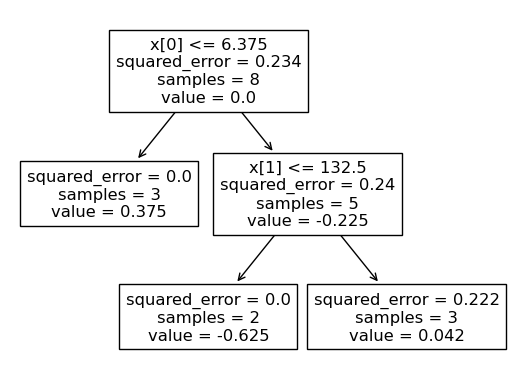

In [419]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

This is the prediction given by the Decision Tree, but we cannot use this as our true prediction, because we are using the decision trees to create mini classes/groups according to the error.And when we find the groups , we try to minimize the Loss function for all the data points belonging to a unique class by adding a term $γ$ to the previous models prediction for all the data points.

<center> $γ_{jm} = argmin_{γ}\;Σ_{xϵR_{jm}}\; L(y_{i},\; F_{m-1}(x_{i})+γ) $  </center>
<center>

here,

[ $i→$ the row number (Data Entry) ]

[ $j→$ class/group created by decision tree (Terminal Node) ]

[ $m→$ tree in cosideration (Model in consideration) ]

[ $γ→$ $\log(odds)$ ]
</center>

On further simplification of the above equation we get :
<center>
$γ_{i} = \dfrac{Σ_{x_{i}ϵR_{jm}}\;(y_{i}-p_{i}^{prev})}{Σ_{x_{i}ϵR_{jm}}\;p_{i}^{prev}(1-p_{i}^{prev})}$
</center>

You may think that why are we calculating the log-odds for minimzing the loss function, when we need probabilities as answer. The reason behind this is mathematical ease, provided by log-odds.

In [420]:
df

,cgpa,iq,is_placed,pred1(log-odds),overall_log_odds,pred1(prob),res1,tree_pred
0,6.82,118,0,0.510826,0.510826,0.625,-0.625,-0.625000
1,6.36,125,1,0.510826,0.510826,0.625,0.375,0.375000
2,5.39,99,1,0.510826,0.510826,0.625,0.375,0.375000
3,5.50,106,1,0.510826,0.510826,0.625,0.375,0.375000
4,6.39,148,0,0.510826,0.510826,0.625,-0.625,0.041667
5,9.13,148,1,0.510826,0.510826,0.625,0.375,0.041667
6,7.17,147,1,0.510826,0.510826,0.625,0.375,0.041667
7,7.72,72,0,0.510826,0.510826,0.625,-0.625,-0.625000


Here is the code for calculating the log-odd value to minimize the Loss function for the second model.


In [421]:
def calculate_log_odds(df,tree_pred):
    num  = 0
    deno = 0
    for i in range(df.shape[0]):
      if df['tree_pred'].iloc[i] == tree_pred:
        num += df['res1'].iloc[i]
        deno += df['pred1(prob)'].iloc[i]*(1 - df['pred1(prob)'].iloc[i])
    return num/deno

In [422]:
pred2_log_odds = []
tree1_pred= dict()
for i in range(df.shape[0]):
  log_odds_i = calculate_log_odds(df,df['tree_pred'].iloc[i])
  pred2_log_odds.append(log_odds_i)
  tree1_pred[df['tree_pred'].iloc[i]] = log_odds_i
pred2_log_odds

[-2.6666666666666665,
 1.6,
 1.6,
 1.6,
 0.17777777777777778,
 0.17777777777777778,
 0.17777777777777778,
 -2.6666666666666665]

The tree2_pred dictionary will help us to predict the log-odds value for any point according to the tree2.

[We are using the concept of Memoization to cut down calcultation during the prediction.]

In [423]:
tree_preds.append(tree1_pred)
tree1_pred

{-0.625: -2.6666666666666665,
 0.375: 1.6,
 0.041666666666666664: 0.17777777777777778}

In [424]:
df['pred2(log-odds)'] = pred2_log_odds

In [425]:
df

,cgpa,iq,is_placed,pred1(log-odds),overall_log_odds,pred1(prob),res1,tree_pred,pred2(log-odds)
0,6.82,118,0,0.510826,0.510826,0.625,-0.625,-0.625000,-2.666667
1,6.36,125,1,0.510826,0.510826,0.625,0.375,0.375000,1.600000
2,5.39,99,1,0.510826,0.510826,0.625,0.375,0.375000,1.600000
3,5.50,106,1,0.510826,0.510826,0.625,0.375,0.375000,1.600000
4,6.39,148,0,0.510826,0.510826,0.625,-0.625,0.041667,0.177778
5,9.13,148,1,0.510826,0.510826,0.625,0.375,0.041667,0.177778
6,7.17,147,1,0.510826,0.510826,0.625,0.375,0.041667,0.177778
7,7.72,72,0,0.510826,0.510826,0.625,-0.625,-0.625000,-2.666667


In above step the 'pred2(log-odds)' generated are the log-odds for minimizing the loss function. Now we are going to overwrite the 'pred2(log-odds)' column with the minimized values. By using :

<center>$[\;F_{m}(x) = F_{m-1}(x) + lr.γ_{jm}\;]\;:xϵR_{jm}$</center>

In [426]:
df['pred2(log-odds)'] = df['overall_log_odds'] + 1*df['pred2(log-odds)']
df['overall_log_odds'] = df['pred2(log-odds)']
df

,cgpa,iq,is_placed,pred1(log-odds),overall_log_odds,pred1(prob),res1,tree_pred,pred2(log-odds)
0,6.82,118,0,0.510826,-2.155841,0.625,-0.625,-0.625000,-2.155841
1,6.36,125,1,0.510826,2.110826,0.625,0.375,0.375000,2.110826
2,5.39,99,1,0.510826,2.110826,0.625,0.375,0.375000,2.110826
3,5.50,106,1,0.510826,2.110826,0.625,0.375,0.375000,2.110826
4,6.39,148,0,0.510826,0.688603,0.625,-0.625,0.041667,0.688603
5,9.13,148,1,0.510826,0.688603,0.625,0.375,0.041667,0.688603
6,7.17,147,1,0.510826,0.688603,0.625,0.375,0.041667,0.688603
7,7.72,72,0,0.510826,-2.155841,0.625,-0.625,-0.625000,-2.155841


Transforming the log-odds into probability :

<center> $p = \dfrac{e^{log(odds)}}{1+e^{log(odds)}}$ </center>
$\;$
<center> $p = \dfrac{1}{1+e^{\;-log(odds)}}$ </center>

In [427]:
df["pred2(prob)"] = 1/(1+np.exp(-df["pred2(log-odds)"]))
df

,cgpa,iq,is_placed,pred1(log-odds),overall_log_odds,pred1(prob),res1,tree_pred,pred2(log-odds),pred2(prob)
0,6.82,118,0,0.510826,-2.155841,0.625,-0.625,-0.625000,-2.155841,0.103787
1,6.36,125,1,0.510826,2.110826,0.625,0.375,0.375000,2.110826,0.891951
2,5.39,99,1,0.510826,2.110826,0.625,0.375,0.375000,2.110826,0.891951
3,5.50,106,1,0.510826,2.110826,0.625,0.375,0.375000,2.110826,0.891951
4,6.39,148,0,0.510826,0.688603,0.625,-0.625,0.041667,0.688603,0.665656
5,9.13,148,1,0.510826,0.688603,0.625,0.375,0.041667,0.688603,0.665656
6,7.17,147,1,0.510826,0.688603,0.625,0.375,0.041667,0.688603,0.665656
7,7.72,72,0,0.510826,-2.155841,0.625,-0.625,-0.625000,-2.155841,0.103787


Again Calculating the psuedo residual to train the third model.
<center>$residual = actual - predict$</center>

In [428]:
df['res2'] = df['is_placed'] - df['pred2(prob)']
df

,cgpa,iq,is_placed,pred1(log-odds),overall_log_odds,pred1(prob),res1,tree_pred,pred2(log-odds),pred2(prob),res2
0,6.82,118,0,0.510826,-2.155841,0.625,-0.625,-0.625000,-2.155841,0.103787,-0.103787
1,6.36,125,1,0.510826,2.110826,0.625,0.375,0.375000,2.110826,0.891951,0.108049
2,5.39,99,1,0.510826,2.110826,0.625,0.375,0.375000,2.110826,0.891951,0.108049
3,5.50,106,1,0.510826,2.110826,0.625,0.375,0.375000,2.110826,0.891951,0.108049
4,6.39,148,0,0.510826,0.688603,0.625,-0.625,0.041667,0.688603,0.665656,-0.665656
5,9.13,148,1,0.510826,0.688603,0.625,0.375,0.041667,0.688603,0.665656,0.334344
6,7.17,147,1,0.510826,0.688603,0.625,0.375,0.041667,0.688603,0.665656,0.334344
7,7.72,72,0,0.510826,-2.155841,0.625,-0.625,-0.625000,-2.155841,0.103787,-0.103787


Repeat the above steps for the second model on third model as well. And Keep repeating them as many times as we want to create the weak models.

In [429]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=3)
tree2.fit(df[['cgpa','iq']],df['res2'])
trees.append(tree2)

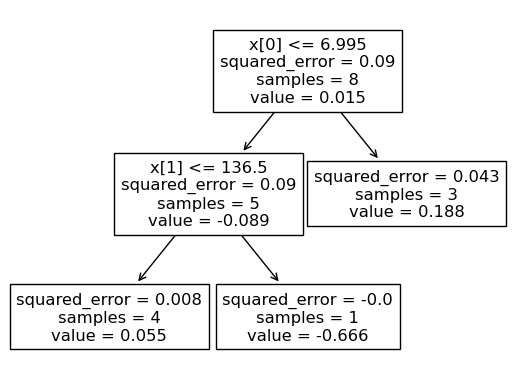

In [430]:
plot_tree(tree2)
plt.show()

In [431]:
df['tree_pred2'] = tree2.predict(df[['cgpa','iq']])
df

,cgpa,iq,is_placed,pred1(log-odds),overall_log_odds,pred1(prob),res1,tree_pred,pred2(log-odds),pred2(prob),res2,tree_pred2
0,6.82,118,0,0.510826,-2.155841,0.625,-0.625,-0.625000,-2.155841,0.103787,-0.103787,0.055090
1,6.36,125,1,0.510826,2.110826,0.625,0.375,0.375000,2.110826,0.891951,0.108049,0.055090
2,5.39,99,1,0.510826,2.110826,0.625,0.375,0.375000,2.110826,0.891951,0.108049,0.055090
3,5.50,106,1,0.510826,2.110826,0.625,0.375,0.375000,2.110826,0.891951,0.108049,0.055090
4,6.39,148,0,0.510826,0.688603,0.625,-0.625,0.041667,0.688603,0.665656,-0.665656,-0.665656
5,9.13,148,1,0.510826,0.688603,0.625,0.375,0.041667,0.688603,0.665656,0.334344,0.188300
6,7.17,147,1,0.510826,0.688603,0.625,0.375,0.041667,0.688603,0.665656,0.334344,0.188300
7,7.72,72,0,0.510826,-2.155841,0.625,-0.625,-0.625000,-2.155841,0.103787,-0.103787,0.188300


In [432]:
def calculate_log_odds2(df,tree_pred):
    num  = 0
    deno = 0
    for i in range(df.shape[0]):
      if df['tree_pred2'].iloc[i] == tree_pred:
        num += df['res2'].iloc[i]
        deno += df['pred2(prob)'].iloc[i]*(1 - df['pred2(prob)'].iloc[i])
    return num/deno

In [433]:
pred3_log_odds = []
tree2_pred = dict()
for i in range(df.shape[0]):
  log_odds_i = calculate_log_odds2(df,df['tree_pred2'].iloc[i])
  pred3_log_odds.append(log_odds_i)
  tree2_pred[df['tree_pred2'].iloc[i]] = log_odds_i
pred3_log_odds

[0.5766511728353335,
 0.5766511728353335,
 0.5766511728353335,
 0.5766511728353335,
 -2.990933056660705,
 1.0497461319984605,
 1.0497461319984605,
 1.0497461319984605]

In [434]:
tree_preds.append(tree2_pred)
tree2_pred

{0.05509013900650854: 0.5766511728353335,
 -0.6656561744927609: -2.990933056660705,
 0.18830033039038171: 1.0497461319984605}

In [435]:
df['pred3(log-odds)'] = pred3_log_odds
df['pred3(log-odds)'] = df['overall_log_odds'] + 1*df['pred3(log-odds)']
df['overall_log_odds'] = df['pred3(log-odds)']
df

,cgpa,iq,is_placed,pred1(log-odds),overall_log_odds,pred1(prob),res1,tree_pred,pred2(log-odds),pred2(prob),res2,tree_pred2,pred3(log-odds)
0,6.82,118,0,0.510826,-1.579190,0.625,-0.625,-0.625000,-2.155841,0.103787,-0.103787,0.055090,-1.579190
1,6.36,125,1,0.510826,2.687477,0.625,0.375,0.375000,2.110826,0.891951,0.108049,0.055090,2.687477
2,5.39,99,1,0.510826,2.687477,0.625,0.375,0.375000,2.110826,0.891951,0.108049,0.055090,2.687477
3,5.50,106,1,0.510826,2.687477,0.625,0.375,0.375000,2.110826,0.891951,0.108049,0.055090,2.687477
4,6.39,148,0,0.510826,-2.302330,0.625,-0.625,0.041667,0.688603,0.665656,-0.665656,-0.665656,-2.302330
5,9.13,148,1,0.510826,1.738350,0.625,0.375,0.041667,0.688603,0.665656,0.334344,0.188300,1.738350
6,7.17,147,1,0.510826,1.738350,0.625,0.375,0.041667,0.688603,0.665656,0.334344,0.188300,1.738350
7,7.72,72,0,0.510826,-1.106095,0.625,-0.625,-0.625000,-2.155841,0.103787,-0.103787,0.188300,-1.106095


In [436]:
df["pred3(prob)"] = 1/(1+np.exp(-df["pred3(log-odds)"]))
df

,cgpa,iq,is_placed,pred1(log-odds),overall_log_odds,pred1(prob),res1,tree_pred,pred2(log-odds),pred2(prob),res2,tree_pred2,pred3(log-odds),pred3(prob)
0,6.82,118,0,0.510826,-1.579190,0.625,-0.625,-0.625000,-2.155841,0.103787,-0.103787,0.055090,-1.579190,0.170910
1,6.36,125,1,0.510826,2.687477,0.625,0.375,0.375000,2.110826,0.891951,0.108049,0.055090,2.687477,0.936284
2,5.39,99,1,0.510826,2.687477,0.625,0.375,0.375000,2.110826,0.891951,0.108049,0.055090,2.687477,0.936284
3,5.50,106,1,0.510826,2.687477,0.625,0.375,0.375000,2.110826,0.891951,0.108049,0.055090,2.687477,0.936284
4,6.39,148,0,0.510826,-2.302330,0.625,-0.625,0.041667,0.688603,0.665656,-0.665656,-0.665656,-2.302330,0.090930
5,9.13,148,1,0.510826,1.738350,0.625,0.375,0.041667,0.688603,0.665656,0.334344,0.188300,1.738350,0.850477
6,7.17,147,1,0.510826,1.738350,0.625,0.375,0.041667,0.688603,0.665656,0.334344,0.188300,1.738350,0.850477
7,7.72,72,0,0.510826,-1.106095,0.625,-0.625,-0.625000,-2.155841,0.103787,-0.103787,0.188300,-1.106095,0.248600


Here lets stop our training of the model with three weak model Ensembled together to form a bigger model.

Now we are going to predict the result by using our trained models.

In [437]:
def predict(cgpa,iq):
  pred = 0
  for i in range(len(trees)):
    print("Model",i,end=" -> ")
    if(i==0):
      print("Log(odds) :",pred)
      pred += tree0_pred
    else:
      tree = trees[i]
      tree_prediction = tree.predict(np.array([[cgpa,iq]]))
      pred += tree_preds[i][float(tree_prediction[0])]
      print("Log(odds) :",pred)
  return 1/(1 + np.exp(-pred))

In [452]:
result = predict(7.2,100)
print("The Result of the Model :", result)

Model 0 -> Log(odds) : 0
Model 1 -> Log(odds) : -2.1558410429006756
Model 2 -> Log(odds) : -1.1060949109022151
The Result of the Model : 0.248599634466498


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
